# Capstone Project - The Battle of Neighborhoods by Anagha Kulkarni

## 1. Introduction / Business Problem

##### 1.1 Introduction

Toronto, the most populous city in Canada is the capital of the province of Ontario. It is a major Canadian city along Lake Ontario’s northwestern shore. It is a dynamic metropolis with a core of soaring skyscrapers, all dwarfed by the iconic, free-standing CN Tower. Toronto has, in recent decades, been transformed into one of the most culturally and ethnically diverse cities in the world. More than 80 ethnic communities are represented, and over half of the city's residents were born outside Canada. 

Multicultural Toronto is home to a culinary wonderland of many cuisines and dishes unique to the city. Toronto's plethora of ethnic food places is a direct result of its multiculturalism. Indian cuisine has always been one of the most popular cuisines not only among the resident population but also among the tourists visiting this city.

<img src="https://www.nydailynews.com/resizer/UpBkgnm55p4x-w62IvQ2LMEPpB4=/800x476/top/arc-anglerfish-arc2-prod-tronc.s3.amazonaws.com/public/PTHIHN5WMZEFDFLF5YRQCOQVMY.jpg" width=600 height=357 />


##### 1.2 Business Problem

With the amount of popularity that  this cuisine has gained over the period of time and especially in the city of toronto, Indian restaurants are also gaining popularity from a business perspective. If you are someone looking to start your own Indian restaurant, then this information is for you. There are several aspects to be considered when starting a new business, we will be focusing on a few aspects here.<br> The success of any business, especially a restaurant, is heavily dependent on its location. The area has to be convenient and safe for the public. One of the other important factors is competition from existing peers. Fierce competition can be a great entry barrier and should be avoided as much as possible.  So, an area where there is a scarcity of Indian restaurants would be preferred. <br> This final project is directed towards finding a best neighborhood in Toronto based on its location, rating and most important, in my opinion, considering the safety of that neighborhood. 

##### 1.3 Target Audience

The organizations, individuals and group of people who would be using and be benefited from this project are:
1. Any organization or individual that wants to setup a new Indian restaurant or want to expand their footprint in Toronto area.
2. Foodies who are looking for areas with best options for Indian cuisine based on ratings. 
3. People who are looking for neighborhoods with higher number of Indian restaurants.   

## 2. Data and Data Sources

**For this project we will need the following data:**

**1. List of Postal Codes in Toronto area along with the Boroughs and Neighborhoods they belong to.<br>** 
This data set contains list of Postal Codes and corresponding Boroughs and Neighborhoods in Toronto area. This dataset will be merged with other dataset that contains geospatial co-ordinates of various postal codes in  Toronto to obtain Latitude & Longitude for each Neighborhood. <br>
Link : https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M
<br><br>
**2. List of postal codes in Toronto area along with their latitude and longitude.<br>**
This data set contains geospatial co-ordinates of various postal codes in  Toronto. This dataset will be merged with other dataset that contains list of Postal Codes and corresponding Boroughs and Neighborhoods in Toronto to obtain Latitude & Longitude for each Neighborhood.<br>
Link : http://cocl.us/Geospatial_data
<br><br>
**3. Current footprint of Indian restaurants in each neighborhood of Toronto area.<br>**
This information will be gathered by marking a call to FourSquare API to fetch venues around each neighborhood within certain radius. We will then filter this dataset to get information about only Indian restaurants.<br>
Link : https://developer.foursquare.com/docs/api-reference/venues/search/
<br><br>
**4. Recent Crime Data in Toronto neighborhoods.<br>**
This dataset contains Toronto Police Data for Years 2014 through 2019. It provides information about what type of offenses were reported along with their location and type of premise where the crimes were committed.<br>
Link : https://www.kaggle.com/kapastor/toronto-police-data-crime-rates-by-neighbourhood


## 3. Problems to be solved with the help of above data

* Which boroughs & neighborhoods in Toronto have ample of Indian Restaurants and which areas they are scarce?
* Based on the ratings, which boroughs & neighborhoods have the best Indian Restaurants in Toronto?
* In order to find a safer location for a new restaurant, which boroughs & neighborhoods have least crime rate in commercial premises?  
* Considering above factors, what is the recommended location to setup a new Indian Restaurant in Toronto?

## 4. Approach

1. Build a dataset of boroughs & neighborhoods in Toronto area along with their geospatial coordinates.
2. Using FourSquare Venue API, get list of all venues within half a mile radius for each neighborhood. 
3. Filter this list to build a dataset of only the Indian Restaurants in each neighborhood.
4. Analyze above dataset to find boroughs & neighborhoods with the greatest number of Indian Restaurants & least number of Indian Restaurants.
5. Using FourSquare Venue Details API, get details for each restaurant such as rating, tips and number of likes.
6. Sort the list of restaurants by ratings and identify the boroughs & neighborhoods that have the best Indian Restaurants.
7. Create a map of Toronto area to visualize the neighborhoods that have the best Indian Restaurants.
8. Build a dataset of crimes committed in Toronto area in year 2019 with details such as Borough, Neighborhood, type of offence and type of premise.
9. Filter this dataset to get information about crimes committed only in Commercial premises. 
10. Analyze the above dataset and identify the boroughs & neighborhoods that have least crime rate in commercial premises.
11. Considering the above data holistically, recommended a location to setup a new Indian Restaurant in Toronto. 

## 5. Methodology

Firstly, let's import required libraries for this project

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib as mpl

from bs4 import BeautifulSoup

import os

!pip install folium
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 93 kB 1.8 MB/s eta 0:00:011
Libraries imported.


#### 5.1 Let's Build a dataset of boroughs & neighborhoods in Toronto area along with their geospatial coordinates

Scraping the raw data (Wikipedia page) to build a dataframe of postal codes, boroughs & neighborhoods in Toronto

In [2]:
raw_data = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text
soup = BeautifulSoup(raw_data, 'xml')

table = soup.find("table")
table_rows = table.tbody.find_all("tr")


res = []
for tr in table_rows:
    td = tr.find_all("td")
    row = [tr.text for tr in td]
    
    # Cleaning up the data by ignoring cells with a borough that is Not assigned.
    if row != [] and row[1] != "Not assigned\n":
        row[2] = row[2].split(",")[0]
        # Assigning neighborhood to be the same as the borough, when a cell has a borough but a "Not assigned" neighborhood.
        if "Not assigned" in row[2]: 
            row[2] = row[1]
        res.append(row)
    
# Creating a Dataframe with 3 columns
df = pd.DataFrame(res, columns = ["PostalCode", "Borough", "Neighborhood"])
df["PostalCode"] = df["PostalCode"].str.replace("\n","")
df["Borough"] = df["Borough"].str.replace("\n","")
df["Neighborhood"] = df["Neighborhood"].str.replace("\n","")
df.head()    

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park
3,M6A,North York,Lawrence Manor
4,M7A,Downtown Toronto,Queen's Park


Getting the latitude and the longitude co-ordinates of each neighborhood

In [3]:
df_geo_coordinates = pd.read_csv('http://cocl.us/Geospatial_data')
df_geo_coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Combining the dataframe for neighborhood data with dataframe for geographical coordinates of each postal code to get final data frame

In [4]:
df_neighb_geo = pd.merge(df, df_geo_coordinates, how='left', left_on = 'PostalCode', right_on = 'Postal Code')

# removing the "Postal Code" columns
df_neighb_geo.drop(["Postal Code","PostalCode"], axis=1, inplace=True)

# as the postal code column was dropped, it would create duplicate records few boroughs & neighborhoods that had mutiple postal codes associated
#dropping the duplicates
df_neighb_geo=df_neighb_geo.drop_duplicates(subset=['Borough', 'Neighborhood'])
df_neighb_geo.head()

,Borough,Neighborhood,Latitude,Longitude
0,North York,Parkwoods,43.753259,-79.329656
1,North York,Victoria Village,43.725882,-79.315572
2,Downtown Toronto,Regent Park,43.654260,-79.360636
3,North York,Lawrence Manor,43.718518,-79.464763
4,Downtown Toronto,Queen's Park,43.662301,-79.389494


#### 5.2 Get list of all venues within half a mile radius for each neighborhood

Let's define a function to get top 100 venues within a radius of 800 meters (roughly 1/2 mile) around a given latitude and longitude using FourSquare API. 
Below function will return a dataframe containing the venue ID, venue name and category.

In [5]:
def get_venues_foursq(lat,long):
    
    #setting up parameters to call foursquare api
    radius=800 #roughly 1/2 mile
    LIMIT=100
    CLIENT_ID = 'EKAARII0A5OS21BF4HLAILPFX4AGU5YZD32CW2PR0IWCR2EZ' # Foursquare ID
    CLIENT_SECRET = 'JHRKVXOZLOG1U42NTUBKJU1X3UNQMNX10OOMUIYKGFKLWXD2' # Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #call foursquare api to get top 100 venues within a radius of 800 meters around a given latitude and longitude
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            long, 
            radius, 
            LIMIT)
    
    # get the result to a json file
    results = requests.get(url).json()
    
    #read the json file and convert it to a list
    venues=results["response"]['groups'][0]['items']
    venue_list=[]
    for row in venues:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_list.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    df = pd.DataFrame(venue_list,columns=['ID','Name','Category'])
    return df

##### 5.3 Filter this list to build a dataset of only the Indian Restaurants in each neighborhood.

Building a dataframe of neighborhood that contains indian restaurants

In [6]:
toronto_indian_rest=pd.DataFrame(columns=['Borough', 'Neighborhood', 'ID','Name'])
count=1
for row in df_neighb_geo.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues_foursq(Latitude,Longitude)
    indian_restaurants=venues[venues['Category']=='Indian Restaurant']   
    print(Neighborhood+', '+ Borough+ ' has '+str(len(indian_restaurants))+' indian restaurants ')
    for resturant_detail in indian_restaurants.values.tolist():
        id, name , category=resturant_detail
        toronto_indian_rest = toronto_indian_rest.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

Parkwoods, North York has 0 indian restaurants 
Victoria Village, North York has 0 indian restaurants 
Regent Park, Downtown Toronto has 0 indian restaurants 
Lawrence Manor, North York has 0 indian restaurants 
Queen's Park, Downtown Toronto has 1 indian restaurants 
Islington Avenue, Etobicoke has 0 indian restaurants 
Malvern, Scarborough has 0 indian restaurants 
Don Mills, North York has 0 indian restaurants 
Parkview Hill, East York has 0 indian restaurants 
Garden District, Downtown Toronto has 0 indian restaurants 
Glencairn, North York has 0 indian restaurants 
West Deane Park, Etobicoke has 0 indian restaurants 
Rouge Hill, Scarborough has 0 indian restaurants 
Woodbine Heights, East York has 0 indian restaurants 
St. James Town, Downtown Toronto has 0 indian restaurants 
Humewood-Cedarvale, York has 0 indian restaurants 
Eringate, Etobicoke has 0 indian restaurants 
Guildwood, Scarborough has 0 indian restaurants 
The Beaches, East Toronto has 1 indian restaurants 
Berczy Pa

In [7]:
toronto_indian_rest.head()

,Borough,Neighborhood,ID,Name
0,Downtown Toronto,Queen's Park,4bedf8b5e24d20a17b567214,Kothur Indian Cuisine
1,East Toronto,The Beaches,4dcd7c6352b1f8915b7e7f7e,Delhi Bistro
2,East York,Leaside,504bcf32e4b0ef19b0e2ecf8,Mt Everest Restaurant
3,Downtown Toronto,Christie,4adb969ef964a520332921e3,Banjara Indian Cuisine
4,Downtown Toronto,Christie,4b7369d7f964a52049ad2de3,Madras Masala


In [8]:
toronto_indian_rest.shape

(38, 4)

From the above information we get that, there are total 38 Indian Restaurants around half a mile radius of neighborhoods in Toronto.

##### 5.4 Analyze above dataset to find boroughs & neighborhoods with the greatest number of Indian Restaurants & least number of Indian Restaurants.

Let's create a plot of Number of Indian Restaurants for each Borough in Toronto.

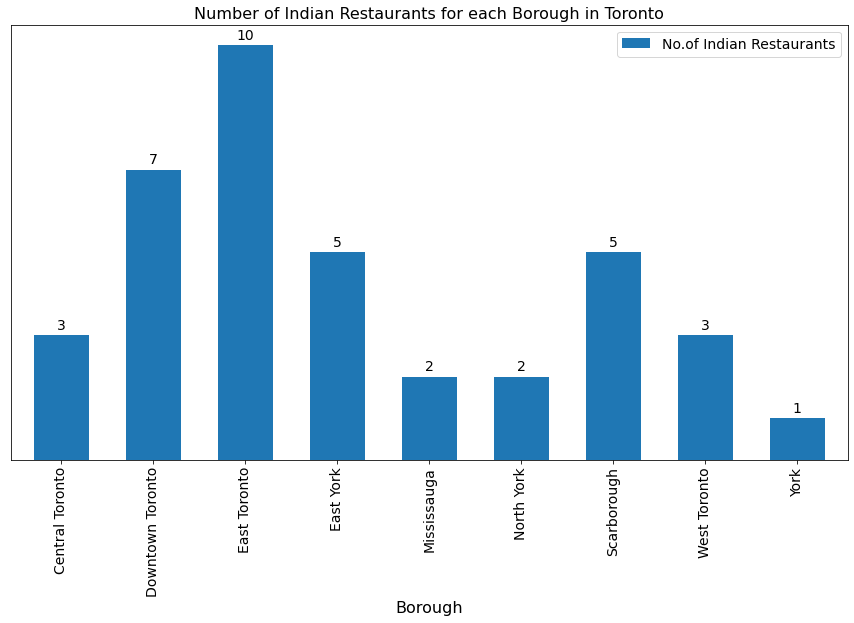

In [16]:
# grouping the data by boroughs
toronto_indian_rest_b=toronto_indian_rest.groupby('Borough')['ID'].count()

#creating a plot
ax = toronto_indian_rest_b.plot.bar(rot=90,figsize=(15, 8),color="tab:blue",width=0.6,fontsize=14)
plt.title(label="Number of Indian Restaurants for each Borough in Toronto",fontdict={'fontsize':"16"} )           
plt.legend(['No.of Indian Restaurants'],loc='upper right', fontsize=14)
plt.xlabel('Borough', fontsize = 16)
ax.get_yaxis().set_visible(False)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=14,
                   xytext = (0, 10), 
                   textcoords = 'offset points')

From the above plot, we can tell that <u>**East Toronto & Downtown Toronto**</u> have large number of indian restaurants and <u>**York & Central Toronto**</u> have least number of indian restaurants.

Let's take a glimpse of indian restaurants in 'East Toronto' borough

In [15]:
toronto_indian_rest[toronto_indian_rest['Borough']=='East Toronto']

,Borough,Neighborhood,ID,Name
1,East Toronto,The Beaches,4dcd7c6352b1f8915b7e7f7e,Delhi Bistro
12,East Toronto,The Danforth West,4c1d5337eac020a1cb1048c2,Sher-E-Punjab
14,East Toronto,India Bazaar,4ae0c7a8f964a520638221e3,Udupi Palace
15,East Toronto,India Bazaar,4afc9816f964a520312422e3,Motimahal
16,East Toronto,India Bazaar,4bac30a2f964a52018ea3ae3,Bombay Chowpatty
17,East Toronto,India Bazaar,4ad9052cf964a520301721e3,Regency Restaurant
18,East Toronto,India Bazaar,4bbcc0efa0a0c9b60ebd1a0f,Haandi 2000
19,East Toronto,India Bazaar,4d8d278a1d06b1f712942a3b,Gautama
20,East Toronto,India Bazaar,4ae4c793f964a5201b9e21e3,The Famous Indian Restaurant
21,East Toronto,India Bazaar,4edd30c09adfe5cbe2818dc4,Lahori Taste & Burger House


Now, let's create a plot of Number of indian restaurants in Top 10 Neighborhoods in Toronto

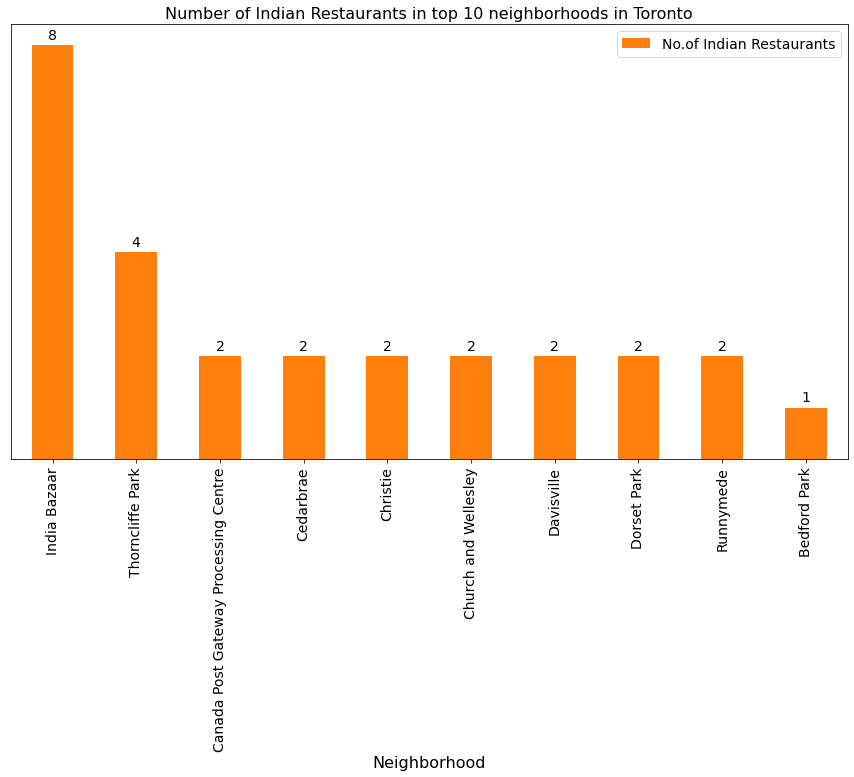

In [17]:
#grouping the data by neighborhoods and taking 10 largest
toronto_indian_rest_n=toronto_indian_rest.groupby('Neighborhood')['ID'].count().nlargest(10)

#creating a plot
ax = toronto_indian_rest_n.plot.bar(rot=90,figsize=(15, 8),color="tab:orange",width=0.5,fontsize=14)
plt.title(label="Number of Indian Restaurants in top 10 neighborhoods in Toronto",fontdict={'fontsize':"16"} )           
plt.legend(['No.of Indian Restaurants'],loc='upper right', fontsize=14)
plt.xlabel('Neighborhood', fontsize = 16)
ax.get_yaxis().set_visible(False)
#plt.ylabel('No.of Indian Restaurants', fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=14,
                   xytext = (0, 10), 
                   textcoords = 'offset points')

Above plot tells us that the neighborhood of <u>**India Bazaar**</u> has the greatest of indian restaurants.

##### 5.5 Get details for each restaurant such as rating, tips and number of likes.

Let's define a function to get venue details such as numeric rating (on the scale of 0 to 10), count of tips, no. of likes for a given venue id. This information will be used for ranking the restaurants.

In [20]:
def get_venue_details_foursq(venue_id):
        
    CLIENT_ID = 'EKAARII0A5OS21BF4HLAILPFX4AGU5YZD32CW2PR0IWCR2EZ' # Foursquare ID
    CLIENT_SECRET = 'JHRKVXOZLOG1U42NTUBKJU1X3UNQMNX10OOMUIYKGFKLWXD2' # Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #call foursquare api to get venue details
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
     # get the result to a json file
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_likes=venue_data['likes']['count']
        venue_details.append([venue_id,venue_name,venue_rating,venue_tips,venue_likes])
    except KeyError:
        pass
        
    column_names=['ID','Name','Rating','Tips','Likes']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

Now let's get the statistics about each restaurant which will help us in further analysis and ranking

In [21]:
toronto_indian_rest_stats=pd.DataFrame(columns=['Borough', 'Neighborhood', 'ID','Name','Rating','Tips','Likes'])
count=1

for row in toronto_indian_rest.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details_foursq(ID)
        print(venue_details)
        id,name,rating,tips,likes=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID,',so setting up stats as 0')
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,rating,tips,likes=[0]*5
    toronto_indian_rest_stats = toronto_indian_rest_stats.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Rating' : rating,
                                                'Tips' : tips,
                                                'Likes' : likes
                                               }, ignore_index=True)
    count+=1

                         ID                   Name  Rating  Tips  Likes
0  4bedf8b5e24d20a17b567214  Kothur Indian Cuisine     8.0    19     16
                         ID          Name  Rating  Tips  Likes
0  4dcd7c6352b1f8915b7e7f7e  Delhi Bistro     6.9     3      6
                         ID                   Name  Rating  Tips  Likes
0  504bcf32e4b0ef19b0e2ecf8  Mt Everest Restaurant     6.8     6      8
                         ID                    Name  Rating  Tips  Likes
0  4adb969ef964a520332921e3  Banjara Indian Cuisine     8.6    75    142
                         ID           Name  Rating  Tips  Likes
0  4b7369d7f964a52049ad2de3  Madras Masala     7.8    22     35
                         ID             Name  Rating  Tips  Likes
0  4d6008f829ef236a8832a059  CANBE Foods Inc     7.9     8     22
                         ID           Name  Rating  Tips  Likes
0  4c77fc87bd346dcb8c90f0ef  La Sani Grill     6.7    12     12
                         ID                        N

In [22]:
toronto_indian_rest_stats.head()

,Borough,Neighborhood,ID,Name,Rating,Tips,Likes
0,Downtown Toronto,Queen's Park,4bedf8b5e24d20a17b567214,Kothur Indian Cuisine,8.0,19,16
1,East Toronto,The Beaches,4dcd7c6352b1f8915b7e7f7e,Delhi Bistro,6.9,3,6
2,East York,Leaside,504bcf32e4b0ef19b0e2ecf8,Mt Everest Restaurant,6.8,6,8
3,Downtown Toronto,Christie,4adb969ef964a520332921e3,Banjara Indian Cuisine,8.6,75,142
4,Downtown Toronto,Christie,4b7369d7f964a52049ad2de3,Madras Masala,7.8,22,35


##### 5.6 Sort the list of restaurants by ratings and identify the boroughs & neighborhoods that have the best Indian Restaurants.

Grouping the dataframe that contains statistics for each indian restaurant by neighborhood

In [25]:
toronto_neigh_stats=toronto_indian_rest_stats.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
toronto_neigh_stats.columns=['Neighborhood','Average Rating']

Let's find top 10 neighborhoods with top average rating of Indian restaurants

In [27]:
toronto_neigh_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
16,The Annex,8.50
9,High Park,8.30
4,Christie,8.20
1,Brockton,8.20
5,Church and Wellesley,8.05
13,Queen's Park,8.00
11,Kensington Market,7.80
6,Davisville,7.50
3,Cedarbrae,7.30
0,Bedford Park,7.30


Grouping the dataframe that contains statistics for each indian restaurant by borough

In [29]:
toronto_borough_stats=toronto_indian_rest_stats.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
toronto_borough_stats.columns=['Borough','Average Rating']

Let's find top boroughs with top average rating of Indian restaurants

In [31]:
toronto_borough_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Borough,Average Rating
1,Downtown Toronto,7.914286
0,Central Toronto,7.833333
7,West Toronto,7.833333
5,North York,6.700000
4,Mississauga,6.350000
8,York,6.200000
2,East Toronto,5.580000
6,Scarborough,5.460000
3,East York,5.460000


Now let's create a plot for Average rating of Indian Restaurants for each Borough

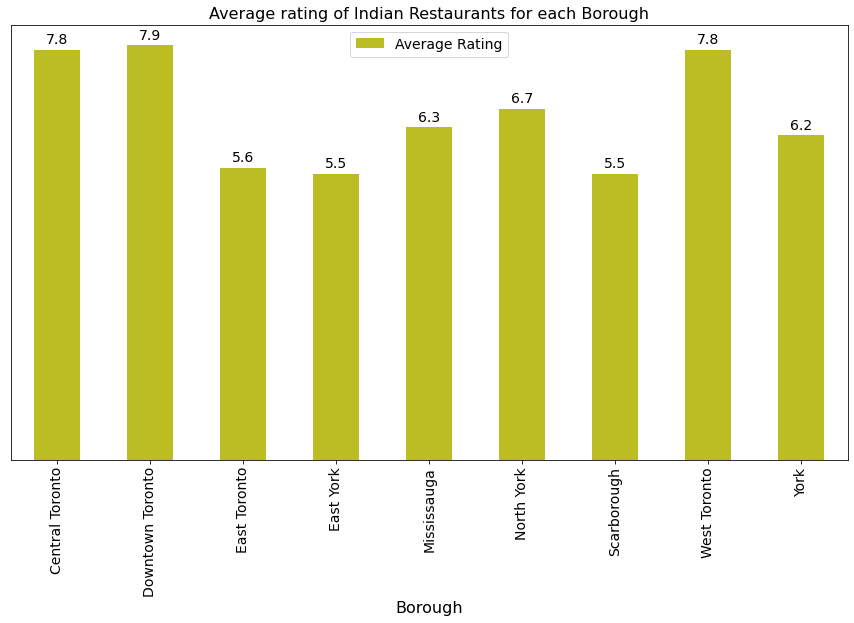

In [35]:
#grouping the data by boroughs
toronto_indian_rest_stats_b=toronto_indian_rest_stats.groupby('Borough').mean()['Rating']

#creating a plot
ax = toronto_indian_rest_stats_b.plot.bar(rot=90,figsize=(15, 8),color="tab:olive",width=0.5,fontsize=14)
plt.title(label="Average rating of Indian Restaurants for each Borough",fontdict={'fontsize':"16"} )           
plt.legend(['Average Rating'],loc='upper center', fontsize=14)
plt.xlabel('Borough', fontsize = 16)
ax.get_yaxis().set_visible(False)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=14,
                   xytext = (0, 10), 
                   textcoords = 'offset points')

From the above plot, we can conclude that <u> **Downtown Toronto** </u> has the best indian restaurants with highest average rating.

Now let's create a plot for Average rating of Indian Restaurants for top 10 neighborhoods

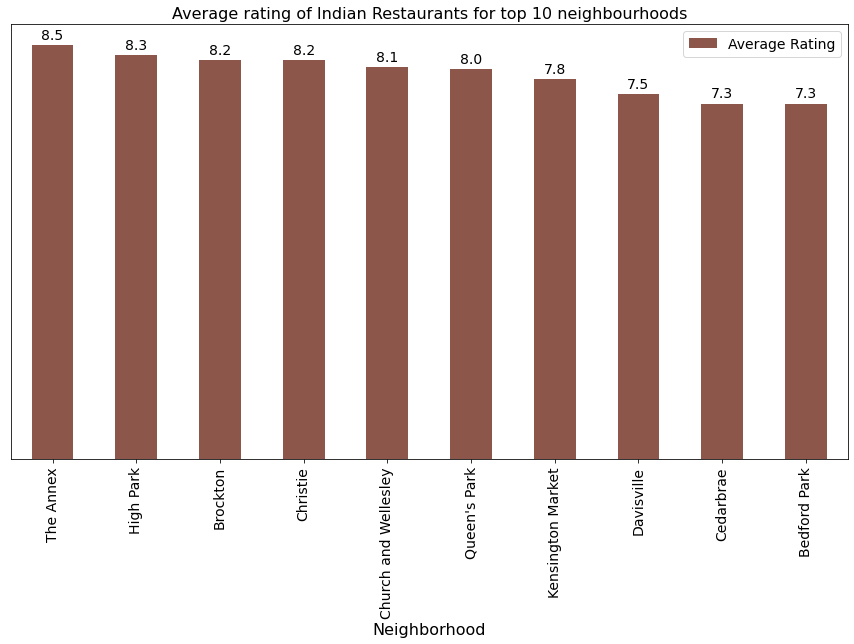

In [36]:
#grouping the data by neighborhoods
toronto_indian_rest_stats_n=toronto_indian_rest_stats.groupby('Neighborhood').mean()['Rating'].nlargest(10)

#creating a plot
ax = toronto_indian_rest_stats_n.plot.bar(rot=90,figsize=(15, 8),color="tab:brown",width=0.5,fontsize=14)
plt.title(label="Average rating of Indian Restaurants for top 10 neighbourhoods",fontdict={'fontsize':"16"} )           
plt.legend(['Average Rating'],loc='upper right', fontsize=14)
plt.xlabel('Neighborhood', fontsize = 16)
ax.get_yaxis().set_visible(False)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=14,
                   xytext = (0, 10), 
                   textcoords = 'offset points')

From the above plot, we can conclude that the neighborhood of <u> **The Annex** </u> has the best indian restaurants with highest average rating.

##### 5.7 Create a map of Toronto area to visualize the neighborhoods that have the best Indian Restaurants.

We will consider all the neighborhoods with average rating greater or equal 7.0 to visualize on map

In [38]:
toronto_neigh_stats_7=toronto_neigh_stats[toronto_neigh_stats['Average Rating']>=7]
toronto_neigh_stats_7=toronto_neigh_stats_7.sort_values(['Average Rating'],ascending=False)
toronto_neigh_stats_7

,Neighborhood,Average Rating
16,The Annex,8.50
9,High Park,8.30
1,Brockton,8.20
4,Christie,8.20
5,Church and Wellesley,8.05
13,Queen's Park,8.00
11,Kensington Market,7.80
6,Davisville,7.50
3,Cedarbrae,7.30
0,Bedford Park,7.30


Let's join this dataset to the Toronto geospatial dataset to get longitude and latitude information.

In [39]:
toronto_neigh_stats=pd.merge(toronto_neigh_stats,df_neighb_geo, on='Neighborhood')
toronto_neigh_stats=toronto_neigh_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
toronto_neigh_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,North York,Bedford Park,43.733283,-79.419750,7.300
1,West Toronto,Brockton,43.636847,-79.428191,8.200
2,Mississauga,Canada Post Gateway Processing Centre,43.636966,-79.615819,6.350
3,Scarborough,Cedarbrae,43.773136,-79.239476,7.300
4,Downtown Toronto,Christie,43.669542,-79.422564,8.200
5,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,8.050
6,Central Toronto,Davisville,43.704324,-79.388790,7.500
7,Scarborough,Dorset Park,43.757410,-79.273304,6.350
8,Downtown Toronto,Harbourfront East,43.640816,-79.381752,7.100
9,West Toronto,High Park,43.661608,-79.464763,8.300


###### Let's visualize this data on Toronto map

Getting geographical coordinates of Toronto city 

In [41]:
address = "Toronto, ON"

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto city are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto city are 43.6534817, -79.3839347.


Creating map for Toronto

In [43]:
toronto_map = folium.Map(location=[latitude, longitude], zoom_start=12)
toronto_map

Adding markers to the map

In [64]:
# instantiate a feature group for the neighborhoods in the dataframe
neigh = folium.map.FeatureGroup()

# loop through the neighborhoods and add each to the neigh feature group
for lat, lng, in toronto_neigh_stats[['Latitude','Longitude']].values:
    neigh.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='black',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    ) 

toronto_neigh_stats['Label']=toronto_neigh_stats['Neighborhood']+', '+toronto_neigh_stats['Borough']+'('+toronto_neigh_stats['Average Rating'].map(str)+')'
    
for lat, lng, label in toronto_neigh_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng],icon=folium.Icon(color="red",icon="cutlery"), popup=label).add_to(toronto_map)        
# add incidents to map
toronto_map.add_child(neigh)    
    
    
toronto_map

##### 5.8 Build a dataset of crimes committed in Toronto area in year 2019 with details such as Borough, Neighborhood, type of offence and type of premise.

As the real world dataset 'https://www.kaggle.com/kapastor/toronto-police-data-crime-rates-by-neighbourhood' is huge, we will consider data only for year 2019 for our analysis. 
Subset of above dataset has been uploaded to github repository after dropping irrelevant columns at below location:
https://raw.githubusercontent.com/Anagha37/Coursera_Capstone/main/MCI_2019.csv. 
<br>Using this csv, let's build a dataset of crimes committed in Toronto area in year 2019 with details such as Borough, Neighborhood, type of offence and type of premise.

In [58]:
#reading the csv file
toronto_crime_df = pd.read_csv('https://raw.githubusercontent.com/Anagha37/Coursera_Capstone/main/MCI_2019.csv', index_col=None)
toronto_crime_df.drop(['event_unique_id','ucr_code','ucr_ext','Division','ObjectId','Hood_ID','reporteddayofyear','reporteddayofweek','reportedhour','occurrenceyear','occurrencemonth','occurrencedayofyear','occurrencedayofweek','occurrenceday','occurrencehour'], axis = 1, inplace = True)
toronto_crime_df.head()

,premisetype,offence,reportedyear,reportedmonth,reportedday,MCI,Neighbourhood,Borough,Long,Lat
0,Apartment,Assault With Weapon,2019,June,14,Assault,Bedford Park-Nortown,North York,-79.415932,43.723015
1,Commercial,Robbery - Business,2019,January,3,Robbery,Princess-Rosethorn,Etobicoke,-79.555473,43.674221
2,Apartment,Assault - Resist/ Prevent Seiz,2019,January,4,Assault,Roncesvalles,West Toronto,-79.435364,43.644207
3,Outside,Discharge Firearm - Recklessly,2019,January,5,Assault,Tam O'Shanter-Sullivan,Scarborough,-79.322212,43.773506
4,Commercial,B&E,2019,January,27,Break and Enter,Long Branch,Etobicoke,-79.532402,43.594738


For our analysis, let's create a new dataframe that has only few columns

In [60]:
crime_neigh_pt = toronto_crime_df[['Borough','Neighbourhood','premisetype','offence']]
crime_neigh_pt.head()

,Borough,Neighbourhood,premisetype,offence
0,North York,Bedford Park-Nortown,Apartment,Assault With Weapon
1,Etobicoke,Princess-Rosethorn,Commercial,Robbery - Business
2,West Toronto,Roncesvalles,Apartment,Assault - Resist/ Prevent Seiz
3,Scarborough,Tam O'Shanter-Sullivan,Outside,Discharge Firearm - Recklessly
4,Etobicoke,Long Branch,Commercial,B&E


##### 5.9 Filter this dataset to get information about crimes committed only in Commercial premises.

In [61]:
comm_crime= crime_neigh_pt[crime_neigh_pt['premisetype']=='Commercial']
comm_crime.head()

,Borough,Neighbourhood,premisetype,offence
1,Etobicoke,Princess-Rosethorn,Commercial,Robbery - Business
4,Etobicoke,Long Branch,Commercial,B&E
6,North York,Downsview-Roding-CFB,Commercial,B&E
8,East Toronto,South Riverdale,Commercial,B&E
16,Downtown Toronto,Waterfront Communities-The Island,Commercial,Assault With Weapon


##### 5.10 Analyze the above dataset and identify the boroughs & neighborhoods that have least crime rate in commercial premises.

Let's group the data by Boroughs

In [62]:
comm_crime_b=comm_crime.groupby(['Borough'])['offence'].count()
comm_crime_b

Borough
Central Toronto      342
Downtown Toronto    1428
East Toronto         320
East York            126
Etobicoke           1049
North York          1083
Scarborough         1214
West Toronto         555
York                 346
Name: offence, dtype: int64

Now let's create a plot for number of offences by Borough in Toronto in 2019

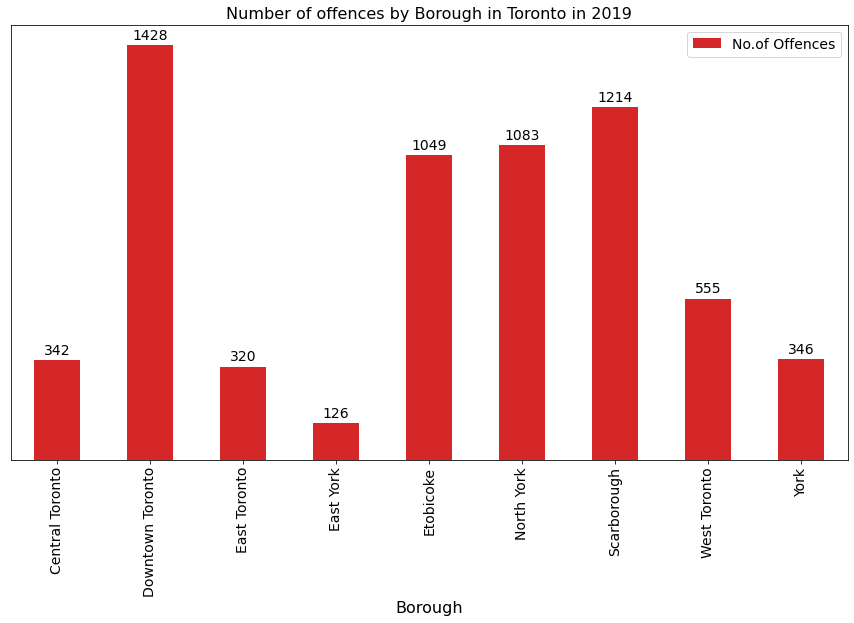

In [63]:
#creating a plot
ax = comm_crime_b.plot.bar(rot=90,figsize=(15, 8),color="tab:red",width=0.5,fontsize=14)

plt.title(label="Number of offences by Borough in Toronto in 2019",fontdict={'fontsize':"16"} )           
plt.legend(['No.of Offences'],loc='upper right', fontsize=14)
plt.xlabel('Borough', fontsize = 16)
ax.get_yaxis().set_visible(False)
#plt.ylabel('No.of Indian Restaurants', fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=14,
                   xytext = (0, 10), 
                   textcoords = 'offset points')

The above plot shows that <u> **Downtown Toronto** </u> is the most vulnerable area and areas like <u> **East York, York, East & Central Toronto** </u> are safer compared to other boroughs.

## 6. Results

Based on the above analysis & visualization of the data, here is what we have found:
1. East Toronto & Downtown Toronto have large number of Indian restaurants and York & Central Toronto have least number of Indian restaurants.<br>
When setting up a new business, it is best to avoid competition with existing established businesses. So, one should consider areas like Central Toronto and York which has a scarcity of Indian restaurants.
2. Downtown Toronto & Central Toronto have the best Indian restaurants with higher average rating compared to Indian restaurants in other boroughs.<br>
When an area is famous for a cuisine, people tend to be attracted to that area more. This can give an edge when starting a new restaurant with same cuisine.  
3. Downtown Toronto is the most vulnerable area and areas like East York, York, East & Central Toronto are safer compared to other boroughs.<br>
Safety is one of the most important aspects to consider while starting a new business. It is best to avoid areas where crime rates are high in commercial establishments.



## 7. Discussion 

* Even though Downtown Toronto has best indian restaurants, the competition from existing indian restaurants will be very high in that area. Moreover, it has highest crime rate in commercial establishments. Hence, this area wouldn't be recommended.
* Areas like York and East York, despite of being safer and having relatively less competition from existing indian restaurants, are not known for having good indian restaurants. Hence, this area wouldn't be recommended either.
* **Central Toronto seems to be having least competition from existing indian restaurants and has best indian restaurants with higher average ratings. It is also one of the safer areas with lower crime rates in commercial establishments.<br> Hence, this area is highly recommended for setting up a new Indian Restaurant in Toronto.**



## 8. Conclusion

We analyzed and did a visual representation of the Indian restaurant data and crimes data within the commercial premise type in the city of Toronto using data analysis and data visualization techniques. This helped us understand the best and the safest place to start a new or establish existing Indian restaurant business. If you are just a customer looking for Indian restaurants around Toronto, this data will help you find places with the best Indian cuisine.